<a href="https://colab.research.google.com/github/gesiele-vaz/analise-rfm-ecommerce/blob/main/outliers_rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
importar numpy como np
importar pandas como pd
importar seaborn como sns
importar matplotlib.pyplot como plt

In [ ]:
df = pd.read_csv ( "Dados.csv" ,  codificação =  "ISO-8859-1" ,  sep =  ',' )
df.head ()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Análise de dados faltantes

In [ ]:
nulo = (
    df.isna().sum()
    .to_frame("valor_nulo")
    .join((df.isna().sum() / df.shape[0]).to_frame('percentual'))
    .sort_values('valor_nulo', ascending=False)
)

nulo.style.format('{:.2%}', subset=['percentual'])

,valor_nulo,percentual
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
df.dropna(subset=['CustomerID'])
df.dropna(subset=['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
price = df['UnitPrice'].isna().sum() | (df['UnitPrice']<=0)
qtd = df['Quantity'].isna().sum() | (df['Quantity']<=0)
print(price, qtd)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 541909, dtype: bool 0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 541909, dtype: bool


In [ ]:
df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Análise dados duplicados

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Mês,Mes
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,1.25,2010-12,2010-12
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,2.10,2010-12,2010-12
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,2.95,2010-12,2010-12
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,4.95,2010-12,2010-12
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom,2.95,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom,0.39,2011-12,2011-12
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom,2.49,2011-12,2011-12
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom,1.95,2011-12,2011-12
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom,2.10,2011-12,2011-12


In [ ]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Mês,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-12


Tratamento de colunas

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('float').astype('Int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

<Axes: >

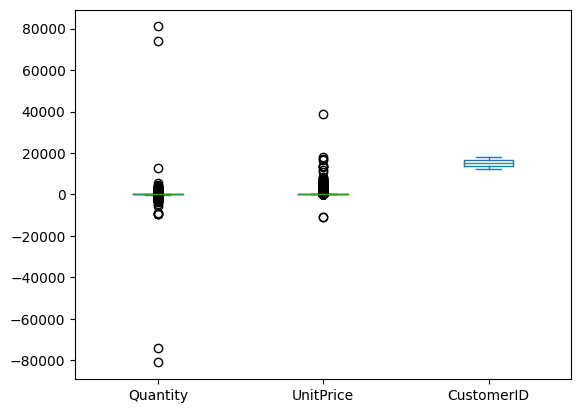

In [ ]:
#outliers
df.plot.box()

In [ ]:
#outliers extremos
df[(df['Quantity'] <= 10000) | (df['UnitPrice'] <= 5000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
#Coluna adicional
df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#data da última compra
última_compra = df['InvoiceDate'].max()
última_compra

Timestamp('2011-12-09 12:50:00')

Gráficos

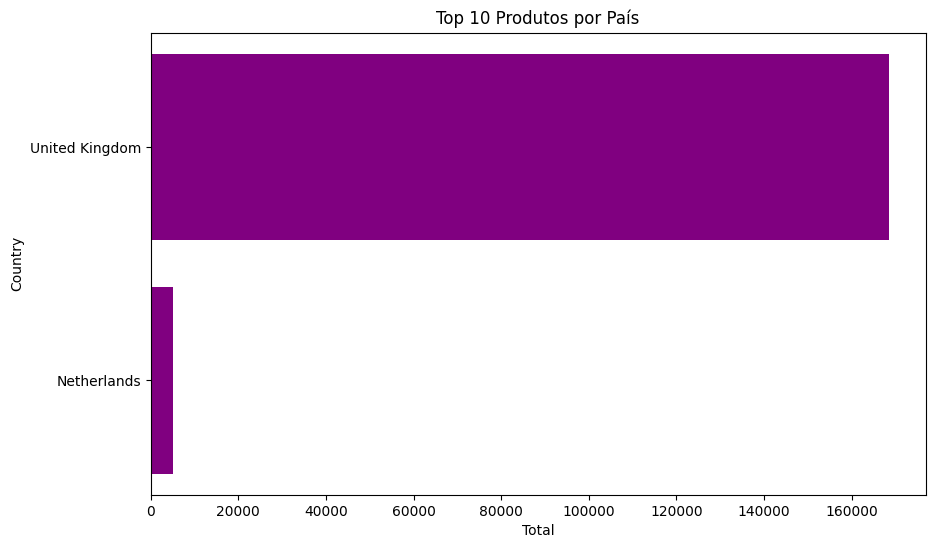

In [ ]:
df_top10 = df.nlargest(10, 'Total')

plt.figure(figsize=(10, 6))
plt.barh(df_top10['Country'], df_top10['Total'], color='purple')
plt.xlabel('Total')
plt.ylabel('Country')
plt.title('Top 10 Produtos por País')
plt.gca().invert_yaxis()
plt.show()

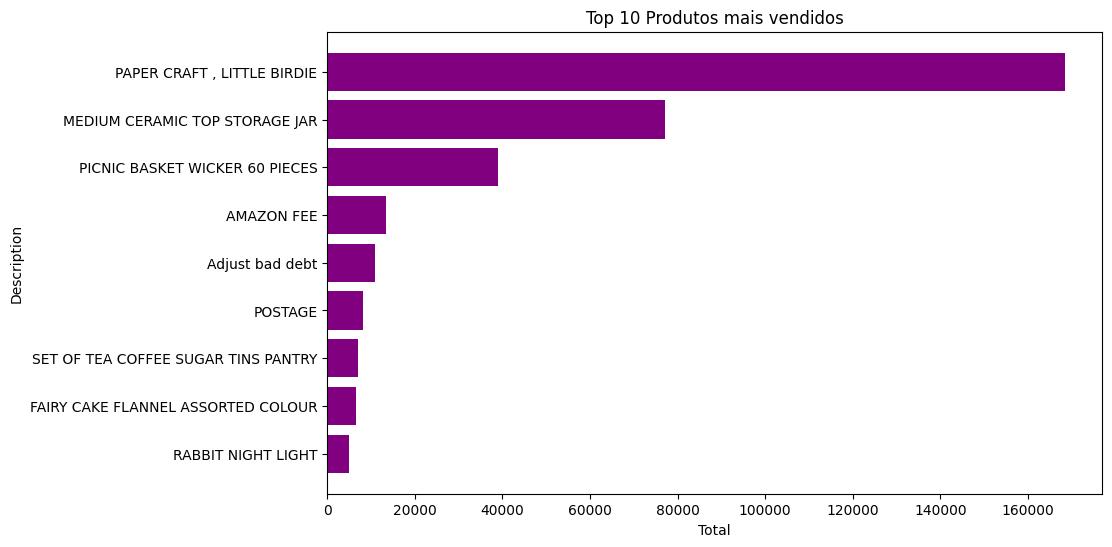

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_top10['Description'], df_top10['Total'], color='purple')
plt.xlabel('Total')
plt.ylabel('Description')
plt.title('Top 10 Produtos mais vendidos')
plt.gca().invert_yaxis()
plt.show()

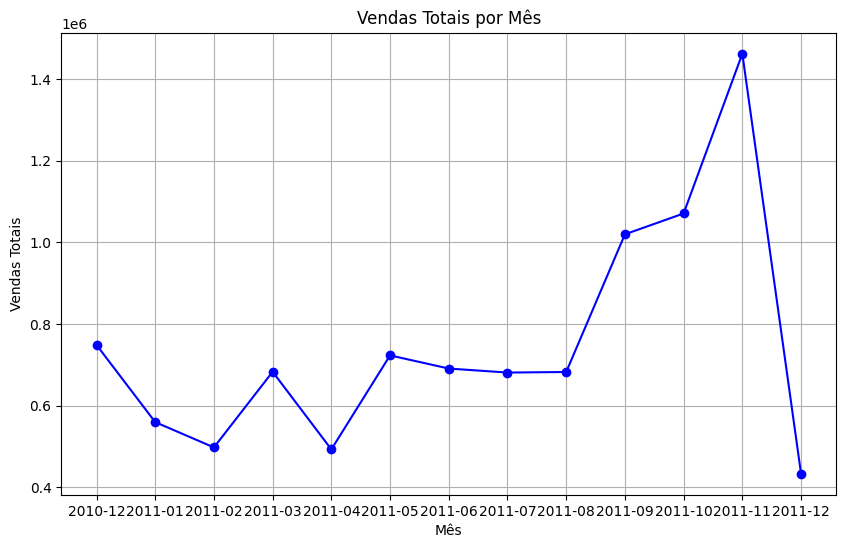

In [ ]:
df['Mês'] = df['InvoiceDate'].dt.to_period('M')
vendas_mensais = df.groupby('Mês')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_mensais['Mês'].astype(str), vendas_mensais['Total'], marker='o', linestyle='-', color='b')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Mês')
plt.grid(True)
plt.show()

<Figure size 1800x800 with 0 Axes>

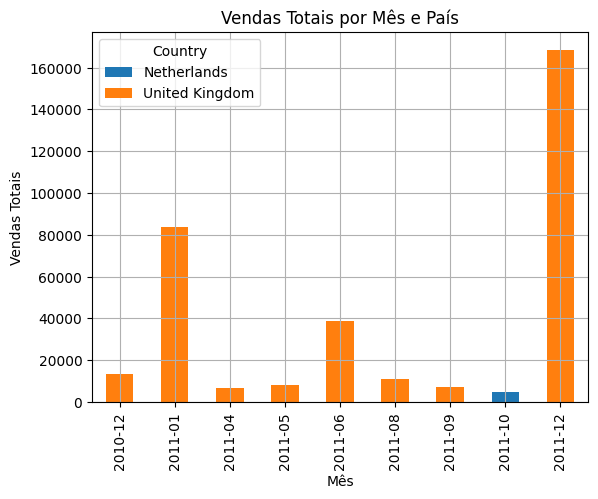

In [ ]:
vendas_mensais_pais = df_top10.groupby(['Mês', 'Country'])['Total'].sum().unstack().fillna(0)

plt.figure(figsize=(18, 8))
vendas_mensais_pais.plot(kind='bar', stacked=True)
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Mês e País')
plt.legend(title='Country', loc='upper left', ncol=1)
plt.grid(True)
plt.show()

Cálculo do RFM

In [ ]:
df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'first',
    'Total': 'sum'
}).reset_index()

,CustomerID,InvoiceNo,InvoiceDate,Total
0,12346,541431,2011-01-18 10:01:00,77183.60
1,12346,C541433,2011-01-18 10:17:00,-77183.60
2,12347,537626,2010-12-07 14:57:00,711.79
3,12347,542237,2011-01-26 14:30:00,475.39
4,12347,549222,2011-04-07 10:43:00,636.25
...,...,...,...,...
22185,18283,579673,2011-11-30 12:59:00,223.61
22186,18283,580872,2011-12-06 12:02:00,208.00
22187,18287,554065,2011-05-22 10:39:00,765.28
22188,18287,570715,2011-10-12 10:23:00,1001.32


In [ ]:
R = df.groupby('CustomerID')['InvoiceDate'].max().dt.date - df.groupby('CustomerID')['InvoiceDate'].min().dt.date
F = df.groupby('CustomerID')['InvoiceNo'].nunique()
M = df.groupby('CustomerID')['Total'].sum()

print(R, F, M)

CustomerID
12346              0:00:00
12347    365 days, 0:00:00
12348    283 days, 0:00:00
12349              0:00:00
12350              0:00:00
               ...        
18280              0:00:00
18281              0:00:00
18282    119 days, 0:00:00
18283    334 days, 0:00:00
18287    159 days, 0:00:00
Name: InvoiceDate, Length: 4372, dtype: object CustomerID
12346     2
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Name: InvoiceNo, Length: 4372, dtype: int64 CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: Total, Length: 4372, dtype: float64
